In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import norm, beta


import sys
sys.path.insert(0, '../lib')
sys.path.insert(0, '../src')


import ml_estimation as ml
import model1_plots as mp
import model1_explore as me
import Utilities as util
import test_stat as ts


In this note book we will show and develop the calculations of the test statistics. Based on a sample and a fit from a beta mixture the statistics will be calculated. 

In [63]:
## draw sample
# make data set
N = 100

def drawMixBeta(N, alpha1, beta1, alpha2, beta2, p, seed = False):
    if seed:
        np.random.seed(0)
    x = np.random.rand(N)
    y1 = beta.rvs(alpha1, beta1, size = N)
    y2 = beta.rvs(alpha2, beta2, size = N)
    u  = (x < p)
    return u * y1 + ~u * y2

params = (2, 7, 5, .9, .7)
x = drawMixBeta(N, *params, seed = True)

est = me.fitMixBetaCTH(x * 16e3)

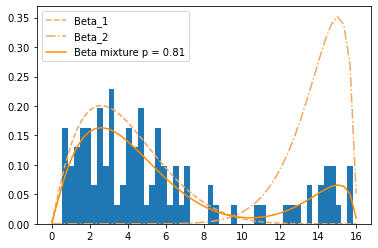

<module 'matplotlib.pyplot' from 'C:\\Users\\nerin\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

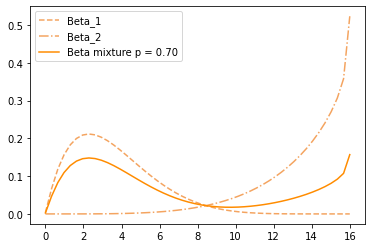

In [64]:
plt.hist(ml.UnitInttoCTH(x)*1e-3, bins = 50, density = True)
mp.plotCTHBetaMix(plt, *est.params)
# plt.ylim([0, 2])
plt.show()
est.params, params
mp.plotCTHBetaMix(plt, *params)



How well is this fit?


In [65]:
k = 5 # mixture of two beta
AIC = ts.AIC(5, est.llf )
BIC = ts.BIC(5, est.llf, N)
print('AIC = ', AIC)
print('BIC = ', BIC)

AIC =  -48.05720832874849
BIC =  -35.03135739880803


### Kolmogorov Smirnov

In [66]:
KS = ts.KS(x, ml.cdf_bmix, args = (est.params[:]))
KS

KstestResult(statistic=0.04195217630708495, pvalue=0.9915783354073694)

### Cramer von Mises

In [67]:
CM = ts.CM(x, ml.cdf_bmix, args = (est.params[:]))
CM

CramerVonMisesResult(statistic=0.021524655437393677, pvalue=0.9955340178710926)

### Anderson Darling

In [68]:
def AD(x, F_cdf, *args):
    y = np.sort(x)
    cdf = F_cdf(y, *args)
    logcdf = np.log(cdf)
    logsf = np.log(1 - cdf)

    i = np.arange(1, N + 1)
    A2 = -N - np.sum((2*i - 1.0) / N * (logcdf + logsf[::-1]), axis=0)

    return A2

AD(x, ml.cdf_bmix, *est.params)

0.152629040711048